**Decision Tree Handson**

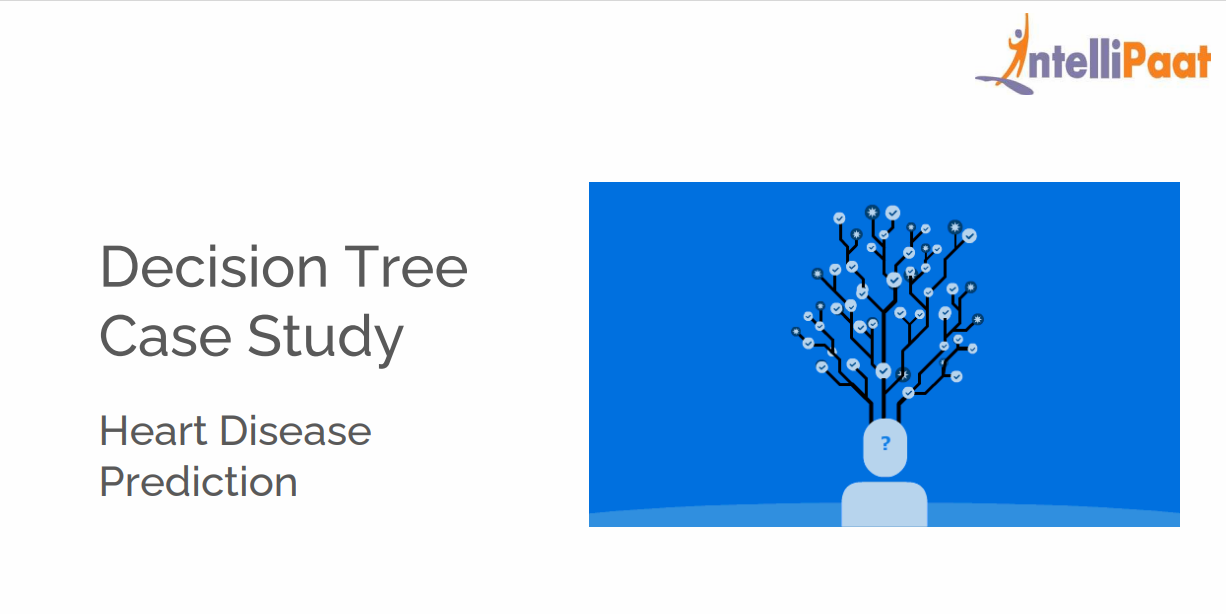

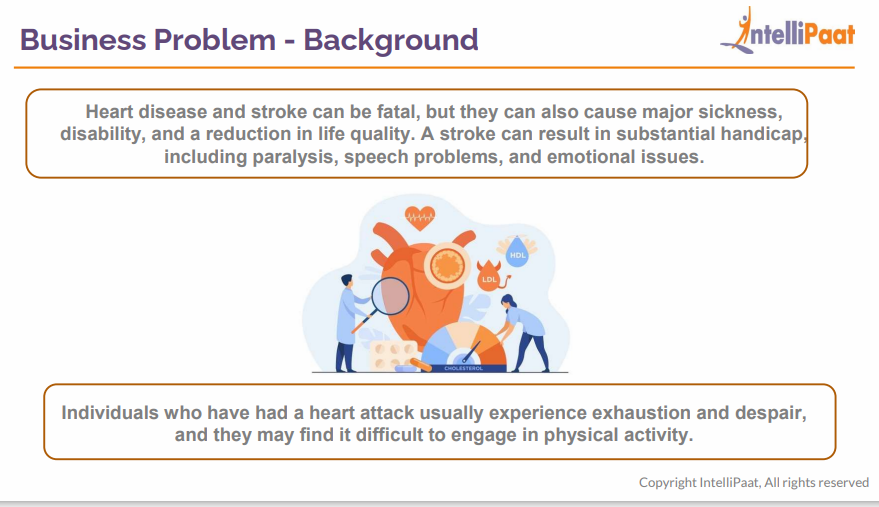

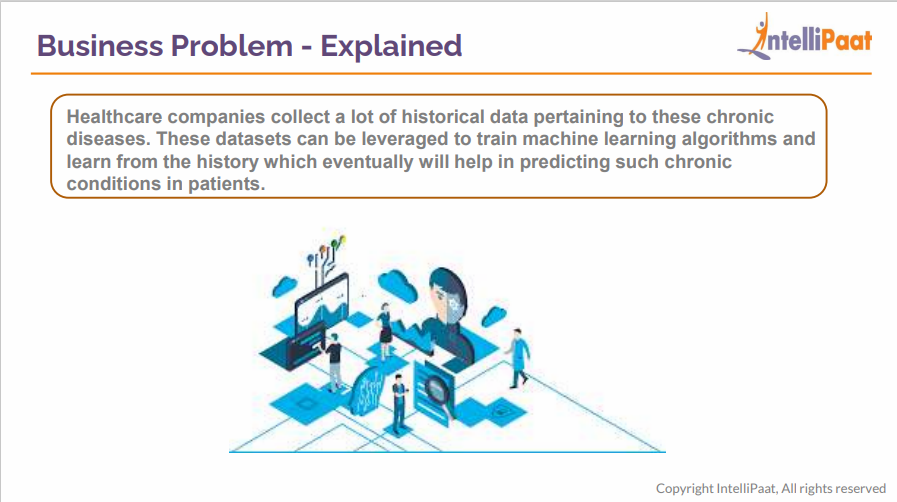

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**age**: the age of the patient in years.

**sex**: the sex of the patient (1 = male, 0 = female).

**cp**: the type of chest pain the patient experienced (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).

**trestbps**: the resting blood pressure of the patient in mm Hg.

**chol**: the serum cholesterol level of the patient in mg/dl.

**fbs**: the fasting blood sugar level of the patient, measured in mg/dl (1 = high, 0 = low).

**restecg**: the resting electrocardiographic results of the patient (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).

(Resting electrocardiographic (ECG or EKG) is a non-invasive diagnostic test that records the electrical activity of the heart while the patient is at rest. The test is performed using an electrocardiogram machine, which records the electrical signals produced by the heart through electrodes placed on the chest, arms, and legs.)

**thalach**: the maximum heart rate achieved by the patient during exercise.
exang: whether the patient experienced exercise-induced angina (1 = yes, 0 = no).

**oldpeak**: the ST depression induced by exercise relative to rest.
slope: the slope of the ST segment during peak exercise (1 = upsloping, 2 = flat, 3 = downsloping).

(ST depression induced by exercise relative to rest
Oldpeak, also known as ST depression, is a common parameter measured during an exercise stress test to evaluate the presence and severity of coronary artery disease. It represents the amount of ST segment depression that occurs on an electrocardiogram (ECG) during exercise compared to rest.)

**ca**: the number of major vessels colored by fluoroscopy (0-3).

(he number of major vessels (0-3) colored by fluoroscopy is a parameter that is used to assess the severity of coronary artery disease (CAD) in patients who undergo coronary angiography)

**thal**: the type of thallium scan performed on the patient (1 = fixed defect, 2 = reversible defect, 3 = normal).

target: the presence of heart disease in the patient (0 = no disease, 1 = disease present).


In [4]:
# EDA- Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
# Visual Exploration

<AxesSubplot:xlabel='age', ylabel='chol'>

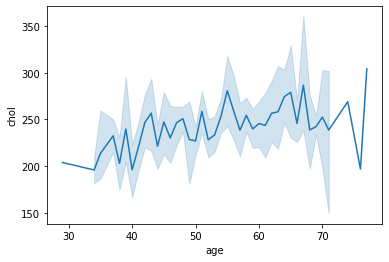

In [11]:
import seaborn as sns
sns.lineplot(data=df,x="age",y="chol")

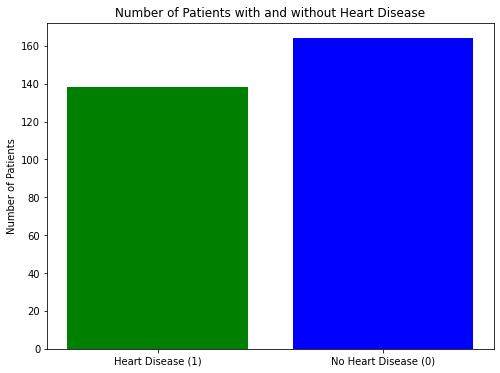

In [36]:
#a. Visualize the number of patients having a heart disease and not having a heart disease


# Count the number of patients with and without heart disease
heart_disease_counts = df['target'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(heart_disease_counts.index, heart_disease_counts.values, color=['blue', 'green'])
plt.xticks(heart_disease_counts.index, ['No Heart Disease (0)', 'Heart Disease (1)'])
plt.ylabel('Number of Patients')
plt.title('Number of Patients with and without Heart Disease')
plt.show()

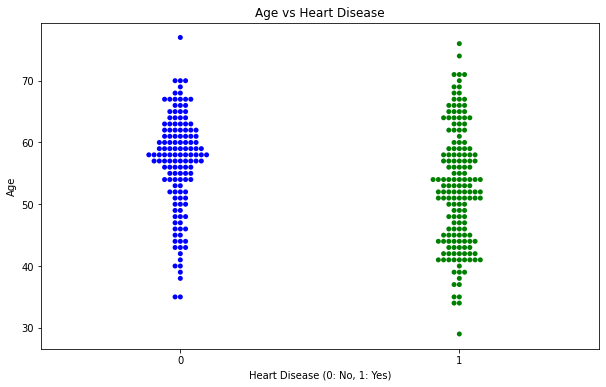

In [37]:
#b. Visualize the age and whether a patient has disease or not

# Plotting
plt.figure(figsize=(10, 6))
sns.swarmplot(x='target', y='age', data=df, palette=['blue', 'green'])
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Age')
plt.title('Age vs Heart Disease')
plt.show()

In [12]:
#df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

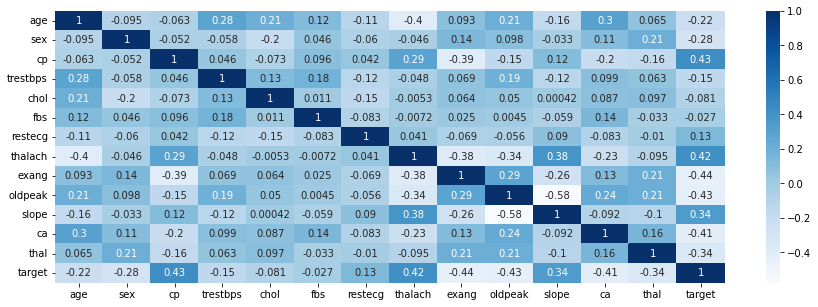

In [38]:
#c. Visualize correlation between all features using a heat map
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),cmap="Blues",annot=True)

***Model Building Process-Decision tree***

In [14]:
# splitting the DATA Into Independent and Dependent
x=df.iloc[:,:-1]      #Independent

In [15]:
y=df["target"]

In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [19]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2


In [20]:
y_train

84     1
270    0
89     1
40     1
130    1
      ..
163    1
214    0
95     1
32     1
131    1
Name: target, Length: 211, dtype: int64

In [21]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3


In [22]:
y_test

165    0
99     1
80     1
113    1
138    1
      ..
102    1
200    0
228    0
284    0
246    0
Name: target, Length: 91, dtype: int64

In [23]:
# Model Implementaion
from sklearn.tree import DecisionTreeClassifier

In [24]:
dt_model=DecisionTreeClassifier()

In [25]:
dt_model.fit(x_train,y_train) #training process

DecisionTreeClassifier()

In [26]:
pred=dt_model.predict(x_test)
pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0], dtype=int64)

In [27]:
y_test

165    0
99     1
80     1
113    1
138    1
      ..
102    1
200    0
228    0
284    0
246    0
Name: target, Length: 91, dtype: int64

In [28]:
from sklearn.metrics  import accuracy_score,confusion_matrix

In [29]:
accuracy_score(y_test,pred)

0.7252747252747253

<AxesSubplot:>

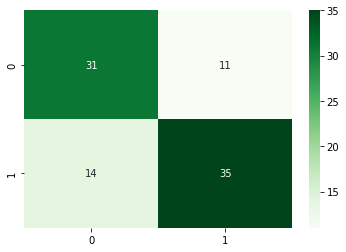

In [30]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True, cmap="Greens")

In [31]:
li=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [32]:
for i in li:
  model=DecisionTreeClassifier(random_state=0,max_depth=i)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)*100
  print("At max depth",i,"accuracy is",acc)

At max depth 1 accuracy is 78.02197802197803
At max depth 2 accuracy is 70.32967032967034
At max depth 3 accuracy is 75.82417582417582
At max depth 4 accuracy is 82.41758241758241
At max depth 5 accuracy is 75.82417582417582
At max depth 6 accuracy is 73.62637362637363
At max depth 7 accuracy is 78.02197802197803
At max depth 8 accuracy is 73.62637362637363
At max depth 9 accuracy is 73.62637362637363
At max depth 10 accuracy is 73.62637362637363
At max depth 11 accuracy is 73.62637362637363
At max depth 12 accuracy is 73.62637362637363
At max depth 13 accuracy is 73.62637362637363
At max depth 14 accuracy is 73.62637362637363
At max depth 15 accuracy is 73.62637362637363


In [33]:
final_model=DecisionTreeClassifier(random_state=0,max_depth=4)
final_model.fit(x_train,y_train)
y_pred=final_model.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
print("At max depth",4,"accuracy is",acc)

At max depth 4 accuracy is 82.41758241758241


In [34]:
from sklearn import tree

[]

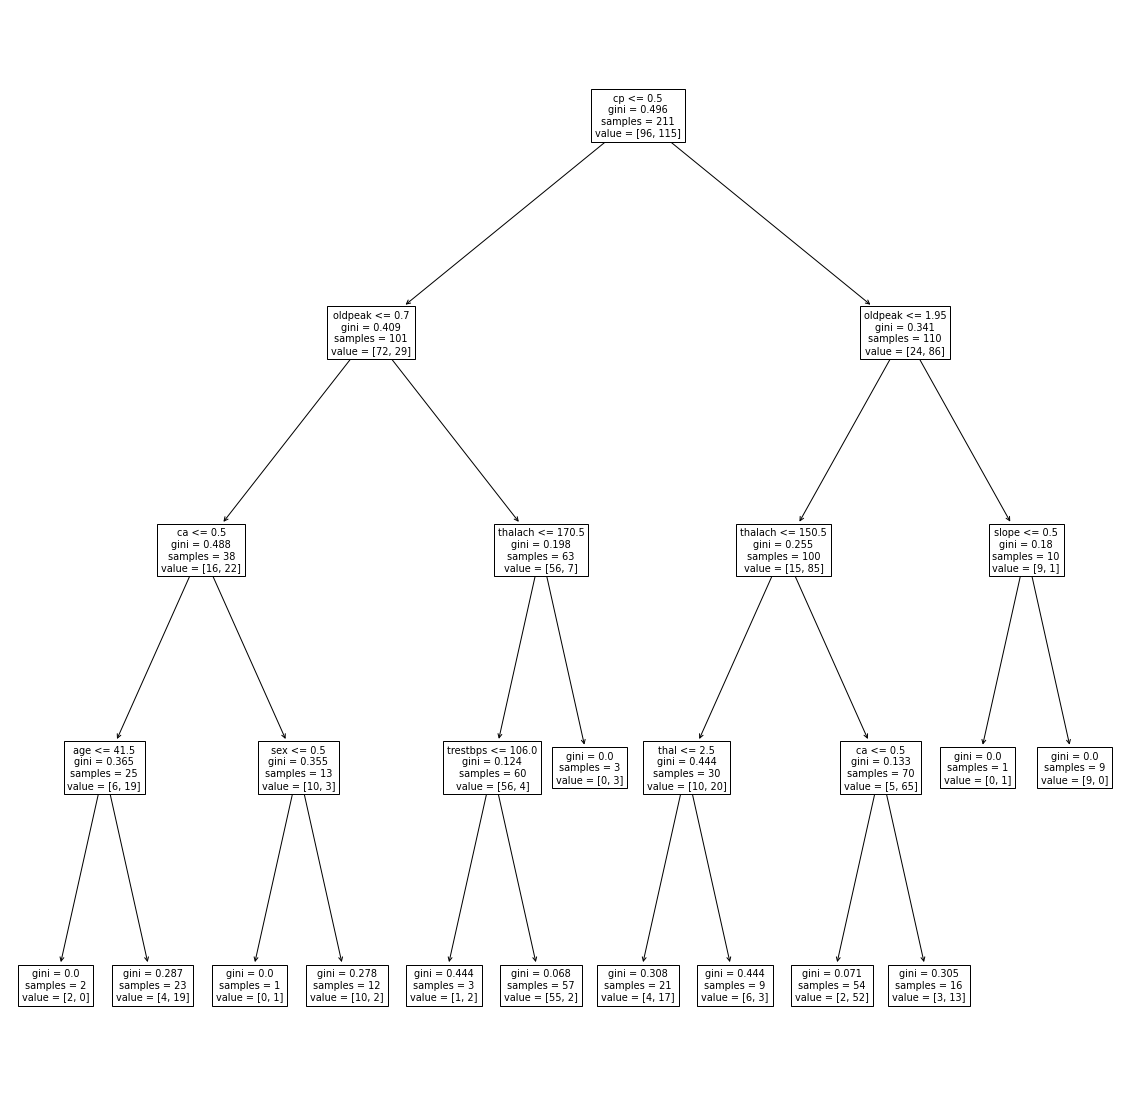

In [35]:
plt.figure(figsize=(20,20))
tree.plot_tree(final_model,feature_names=x.columns)
plt.plot()

## Model - Logistic regression

In [39]:
# Standaridization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

In [40]:
x_std

array([[ 0.94979429,  0.68265615,  1.97647049, ..., -2.27118179,
        -0.71491124, -2.1479552 ],
       [-1.92854796,  0.68265615,  1.005911  , ..., -2.27118179,
        -0.71491124, -0.51399432],
       [-1.48572607, -1.46486632,  0.0353515 , ...,  0.97951442,
        -0.71491124, -0.51399432],
       ...,
       [ 1.50332164,  0.68265615, -0.93520799, ..., -0.64583368,
         1.27497996,  1.11996657],
       [ 0.28556146,  0.68265615, -0.93520799, ..., -0.64583368,
         0.28003436,  1.11996657],
       [ 0.28556146, -1.46486632,  0.0353515 , ..., -0.64583368,
         0.28003436, -0.51399432]])

In [49]:
from sklearn.model_selection import train_test_split

# Assuming 'x_std' contains the standardized features and 'y' contains the target variable

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3, random_state=42)


In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[34,  8],
       [ 9, 40]], dtype=int64)

In [54]:
acc_logistic=accuracy_score(y_test,y_pred)*100

In [55]:
acc_logistic

81.31868131868131

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        42
           1       0.83      0.82      0.82        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



##Model - Random forest

In [57]:
# Model Implementation
from sklearn.ensemble import RandomForestClassifier

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [65]:
rf=RandomForestClassifier(n_estimators=150)

In [66]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150)

In [67]:
# Testing thew model
pred_rf=rf.predict(x_test)

In [68]:
pred_rf

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0], dtype=int64)

In [69]:
# measure the performance of model
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,pred_rf)

0.8461538461538461

<AxesSubplot:>

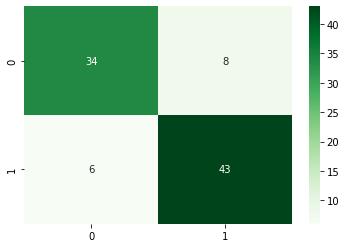

In [70]:
sns.heatmap(confusion_matrix(y_test,pred_rf),cmap="Greens",annot=True,fmt="d")

In [71]:
# optimization based on number of trees
estimators=[50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]

In [73]:
for i in estimators:
  model=RandomForestClassifier(n_estimators=i,random_state=45)
  model.fit(x_train,y_train)
  pred_rf1=model.predict(x_test)
  acc=accuracy_score(y_test,pred_rf1)
  print("For the combination of",i," number of Decsion trees accuracy is",acc)

For the combination of 50  number of Decsion trees accuracy is 0.8241758241758241
For the combination of 100  number of Decsion trees accuracy is 0.8461538461538461
For the combination of 150  number of Decsion trees accuracy is 0.8571428571428571
For the combination of 200  number of Decsion trees accuracy is 0.8681318681318682
For the combination of 250  number of Decsion trees accuracy is 0.8681318681318682
For the combination of 300  number of Decsion trees accuracy is 0.8571428571428571
For the combination of 350  number of Decsion trees accuracy is 0.8571428571428571
For the combination of 400  number of Decsion trees accuracy is 0.8571428571428571
For the combination of 450  number of Decsion trees accuracy is 0.8571428571428571
For the combination of 500  number of Decsion trees accuracy is 0.8571428571428571
For the combination of 550  number of Decsion trees accuracy is 0.8571428571428571
For the combination of 600  number of Decsion trees accuracy is 0.8571428571428571
For t

In [75]:
#200 decision trees accuracy is more
model_rf=RandomForestClassifier(n_estimators=200,random_state=45)
model_rf.fit(x_train,y_train)
pred_rf1=model_rf.predict(x_test)
acc=accuracy_score(y_test,pred_rf1)

In [76]:
acc

0.8681318681318682

In [77]:
print(classification_report(y_test,pred_rf1))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        42
           1       0.86      0.90      0.88        49

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

